# Template of a SMI jupyter notebook

In [1]:
# These packages should all be installed if the procedure was followed

import matplotlib.pyplot as plt
from smi_analysis import SMI_beamline
import numpy as np
import fabio
import os
plt.rcParams["figure.figsize"] = (10, 5)

ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_csr: cannot import name 'ocl_azim_csr' from 'pyFAI' (/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/pyFAI/__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_lut for: cannot import name 'ocl_azim_lut' from 'pyFAI' (/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/pyFAI/__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_sort for: cannot import name 'ocl_sort' from 'pyFAI' (/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/pyFAI/__init__.py)


In [2]:
SMI_beamline??

Type:        module
String form: <module 'smi_analysis.SMI_beamline' from '/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/smi_analysis/SMI_beamline.py'>
File:        /nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/smi_analysis/SMI_beamline.py
Source:     
import enum
from pyFAI import azimuthalIntegrator
from pygix import Transform
from smi_analysis import Detector, stitch, integrate1D
import os
import fabio
import numpy as np
import copy


class SMI_geometry():
    def __init__(self,
                 geometry,
                 sdd,
                 wav,
                 center,
                 bs_pos,
                 detector,
                 det_ini_angle=0,
                 det_angle_step=0,
                 det_angles=[],
                 alphai=0,
                 bs_kind=None):

        self.geometry = geometry
        self.sdd = sdd
        self.wav = wav
        self.geometry = geometry
        self.alphai = np.rad2deg(-alphai

## Experimental configuration

In [83]:
geometry = 'Transmission'
energy = 2.45
wav = 1E-10 * (12.398/energy)
bs_kind = 'pindiode'
incident_angle = np.deg2rad(0)

#WAXS
detector_waxs = 'Pilatus900kw'
sdd_waxs = 280
center_waxs = [97, 1255.9]
bs_pos_waxs = [[97, 1070], [0, 0], [0, 0]]

# SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
#                                      detector = detector_waxs,
#                                      sdd = sdd_waxs,
#                                      wav = wav,
#                                      alphai = incident_angle,
#                                      center = center_waxs,
#                                      bs_pos = bs_pos_waxs,
#                                      bs_kind = bs_kind)


## Locate the files on your computer

In [7]:
import pathlib

In [84]:
CYCLE='2024_1'
proposal_id =  '314903_Chaney_04'

# path = '/nsls2/data/smi/legacy/results/data/%s/%s/900KW/'%(CYCLE, proposal_id)
path = pathlib.Path('/nsls2/data/smi/proposals/2024-1/pass-314903/raw_04/900KW')

for file in sorted(path.glob('*wa20*')):
        print(file.name)

TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa20_bpm5.096_id515782_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa20_bpm5.128_id515783_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2455.00eV_wa20_bpm5.164_id515784_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2460.00eV_wa20_bpm5.223_id515785_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2465.00eV_wa20_bpm5.263_id515786_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.00eV_wa20_bpm5.288_id515787_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.25eV_wa20_bpm5.281_id515788_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.50eV_wa20_bpm5.268_id515789_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2470.75eV_wa20_bpm5.291_id515790_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.00eV_wa20_bpm5.269_id515791_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.25eV_wa20_bpm5.290_id515792_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.50eV_wa20_bpm5.276_id515793_000000_WAXS.tif
TC_Trmsn_01_prs0deg_sdd1.8m_2471.75eV_wa20_bpm5.278_id515794_000000_WAXS.tif

In [54]:
#waxs
# path = '/nsls2/data/smi/legacy/results/data/%s/%s/900KW/'%(CYCLE, proposal_id)
# ResDir = '/nsls2/data/smi/legacy/results/analysis/%s/%s/reduced_waxs/'%(CYCLE, proposal_id)

sam, sam1 = [], []
for file in sorted(os.listdir(path)):
     if 'wa20' in file and 'nexafs' not in file:
        idx = file.find('wa20')

        sam = sam + [file[:idx+1]]

# print(sam)

all_dat = [[]] * len(sam)
all_da = [[]] * len(sam)
    
for j, sa in enumerate(sam): 
    for file in sorted(os.listdir(path)):
        if sa in file and 'tif' in file:
            all_dat[j] = all_dat[j] + [file]
            
print(all_dat[1])
            
for i, all_d in enumerate(all_dat):
    for wa in ['wa0', 'wa20', 'wa40']:
        for dat in all_d:
            if wa in dat:
                all_da[i] = all_da[i] + [dat]

print(all_da[0])

['TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa0_bpm5.170_id515720_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa20_bpm5.128_id515783_000000_WAXS.tif']
['TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa0_bpm5.144_id515719_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa20_bpm5.096_id515782_000000_WAXS.tif']


## Data stitching and reduction (all this part is done using SMI_beamline package)

In [43]:
flat_path = '/nsls2/data/smi/legacy/results/analysis/%s/%s/'%(CYCLE, '314483_Freychet_04')
flatfield = np.rot90(fabio.open(os.path.join(flat_path, 'GF_Flatfield_Sedge_uhighg1600eV_10s_wa20_2477eV_pffBT4T_id481136_000000_WAXS.tif')).data, 1)


# plt.figure()
# plt.imshow(flatfield, vmin=0, vmax=500)
# plt.show()


In [103]:
all_da

[['TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa0_bpm5.144_id515719_000000_WAXS.tif',
  'TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa20_bpm5.096_id515782_000000_WAXS.tif'],
 ['TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa0_bpm5.170_id515720_000000_WAXS.tif',
  'TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa20_bpm5.128_id515783_000000_WAXS.tif'],
 ['TC_Trmsn_01_prs0deg_sdd1.8m_2455.00eV_wa0_bpm5.220_id515721_000000_WAXS.tif',
  'TC_Trmsn_01_prs0deg_sdd1.8m_2455.00eV_wa20_bpm5.164_id515784_000000_WAXS.tif'],
 ['TC_Trmsn_01_prs0deg_sdd1.8m_2460.00eV_wa0_bpm5.271_id515722_000000_WAXS.tif',
  'TC_Trmsn_01_prs0deg_sdd1.8m_2460.00eV_wa20_bpm5.223_id515785_000000_WAXS.tif'],
 ['TC_Trmsn_01_prs0deg_sdd1.8m_2465.00eV_wa0_bpm5.306_id515723_000000_WAXS.tif',
  'TC_Trmsn_01_prs0deg_sdd1.8m_2465.00eV_wa20_bpm5.263_id515786_000000_WAXS.tif'],
 ['TC_Trmsn_01_prs0deg_sdd1.8m_2470.00eV_wa0_bpm5.343_id515724_000000_WAXS.tif',
  'TC_Trmsn_01_prs0deg_sdd1.8m_2470.00eV_wa20_bpm5.288_id515787_000000_WAXS.tif'],
 ['TC_Trmsn_01_p

2.54


/tmp/ipykernel_118593/2981093370.py:62: RuntimeWarning: invalid value encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, :195]+1E-7
/tmp/ipykernel_118593/2981093370.py:68: RuntimeWarning: divide by zero encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
/tmp/ipykernel_118593/2981093370.py:68: RuntimeWarning: invalid value encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
/tmp/ipykernel_118593/2981093370.py:74: RuntimeWarning: invalid value encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, -195:]+1E-7


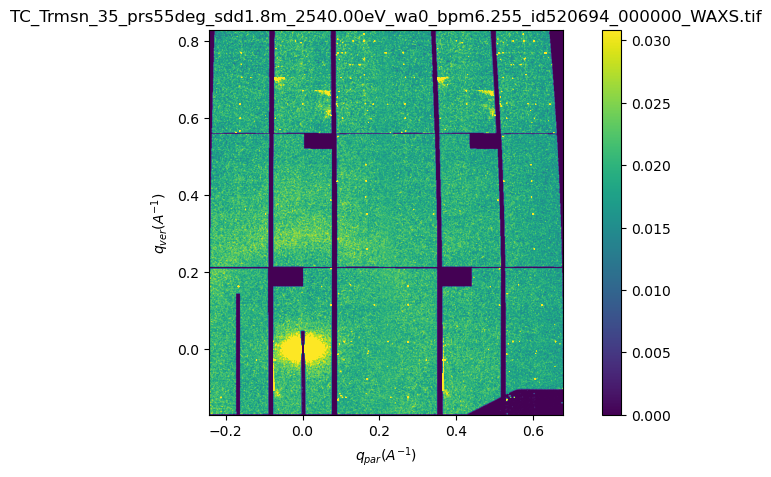

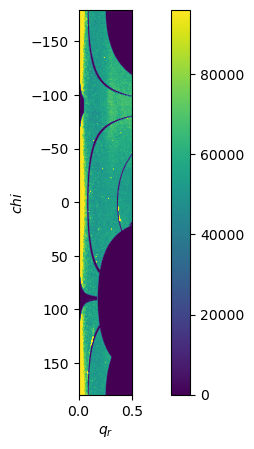

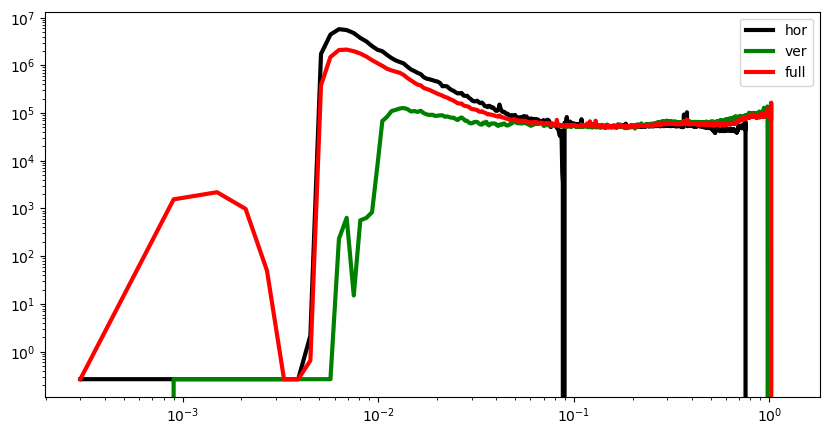

Done


In [105]:
#waxs

for j, dat in enumerate(all_dat[-2:-1]):
             
        waxs_angle = [np.deg2rad(-0.06), np.deg2rad(19.7-0.06)]
        
        idx = dat[0].find('eV')
        energy = 0.001*float(dat[0][idx-7:idx])
        print(energy)
        wav = 1E-10 * (12.398/energy)

        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = detector_waxs,
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = 0,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = waxs_angle,
                                             bs_kind = None)
        
        
        SMI_waxs.open_data(path, dat)
#         SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield
        SMI_waxs.masks[1][1254, 47], SMI_waxs.masks[1][1255, 47]=True, True
        SMI_waxs.masks[4][1254, 47], SMI_waxs.masks[4][1255, 47]=True, True

        SMI_waxs.masks[1][979:1050, 0:100], SMI_waxs.masks[4][979:1050, 0:100]=True, True
        SMI_waxs.masks[1][967, 67], SMI_waxs.masks[4][967, 67]=True, True
                
        SMI_waxs.masks[1][490:555, 100:], SMI_waxs.masks[4][490:555, 100:]=True, True
        
        SMI_waxs.masks[1][1231, 174], SMI_waxs.masks[1][1232, 174]=True, True
        SMI_waxs.masks[4][1231, 174], SMI_waxs.masks[4][1232, 174]=True, True
        
        SMI_waxs.masks[1][1414, 179], SMI_waxs.masks[1][1415, 179]=True, True
        SMI_waxs.masks[4][1414, 179], SMI_waxs.masks[4][1415, 179]=True, True
        
        SMI_waxs.masks[1][858, 5], SMI_waxs.masks[1][859, 5]=True, True
        SMI_waxs.masks[4][858, 5], SMI_waxs.masks[4][859, 5]=True, True
            
        SMI_waxs.masks[1][414, 6], SMI_waxs.masks[4][414, 6], =True, True
        SMI_waxs.masks[1][394, 138], SMI_waxs.masks[4][394, 138]=True, True

        SMI_waxs.masks[1][364, 41], SMI_waxs.masks[1][365, 41]=True, True
        SMI_waxs.masks[4][364, 41], SMI_waxs.masks[4][365, 41]=True, True
        
        SMI_waxs.masks[1][364, 96], SMI_waxs.masks[1][365, 96]=True, True
        SMI_waxs.masks[4][364, 96], SMI_waxs.masks[4][365, 96]=True, True
        
        SMI_waxs.masks[1][304, 96], SMI_waxs.masks[1][305, 96], SMI_waxs.masks[1][304, 97], SMI_waxs.masks[1][305, 97]=True, True, True, True
        SMI_waxs.masks[4][304, 96], SMI_waxs.masks[4][305, 96], SMI_waxs.masks[4][304, 97], SMI_waxs.masks[4][305, 97]=True, True, True, True

        
        SMI_waxs.masks[1][181, 97], SMI_waxs.masks[1][182, 97], SMI_waxs.masks[1][181, 98], SMI_waxs.masks[1][182, 98]=True, True, True, True
        SMI_waxs.masks[4][181, 97], SMI_waxs.masks[4][182, 97], SMI_waxs.masks[4][181, 98], SMI_waxs.masks[4][182, 98]=True, True, True, True

        # plt.figure()
        for i, (img, mask) in enumerate(zip(SMI_waxs.imgs, SMI_waxs.masks)):
            if i%3==0:
                SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, :195]+1E-7
                SMI_waxs.masks[i][np.where(flatfield[:, :195]<1)] = True
#                 SMI_waxs.masks[i][np.where(flatfield[:, :195]>50)] = True
#                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

            if i%3==1:
                SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
                SMI_waxs.masks[i][np.where(flatfield[:, 211:406]<1)] = True
#                 SMI_waxs.masks[i][np.where(SMI_waxs.flatfield<0.1)] = True
#                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

            if i%3==2:
                SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, -195:]+1E-7
                SMI_waxs.masks[i][np.where(flatfield[:, -195:]<1)] = True
#                 SMI_waxs.masks[i][np.where(flatfield[:, -195:]>50)] = True
#                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

        #     plt.subplot(1, len(SMI_waxs.imgs), i+1)
        #     plt.imshow(SMI_waxs.imgs[i]*np.logical_not(SMI_waxs.masks[i]), vmin = 0, vmax = 0.1)
        # plt.show()

        SMI_waxs.stitching_data(interp_factor=3, flag_scale=False)

        
        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title(f'{dat[0]}')
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        
        SMI_waxs.caking()
        plt.figure()
        plt.imshow(SMI_waxs.cake,
                   extent=[SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.cake, 97),
                   aspect=0.01)    
        # plt.title('waxs_%s'%sam[j])
        plt.xlim(0, 0.5)
        plt.xlabel('$q_r$')
        plt.ylabel('$chi$')
        plt.colorbar()
        plt.show()


        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-30, 30], npt = 2000)
        q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-120, -60], npt = 2000)
        q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-180, 180], npt = 2000)
        q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad

#         SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-90, -70], npt=5000)
#         q3, I3 = SMI_waxs.q_rad, SMI_waxs.I_rad



#         SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[70, 90], npt=5000)
#         q4, I4 = SMI_waxs.q_rad, SMI_waxs.I_rad

        plt.figure()
        plt.plot(q0, I0, linewidth = 3, color = 'k', label='hor')
        plt.plot(q1, I1, linewidth = 3, color = 'g', label='ver')
        plt.plot(q2, I2, linewidth = 3, color = 'r', label='full')

        plt.yscale('log')
        plt.xscale('log')
        plt.legend()

        plt.show()

plt.close('all')
print('Done')

2.54


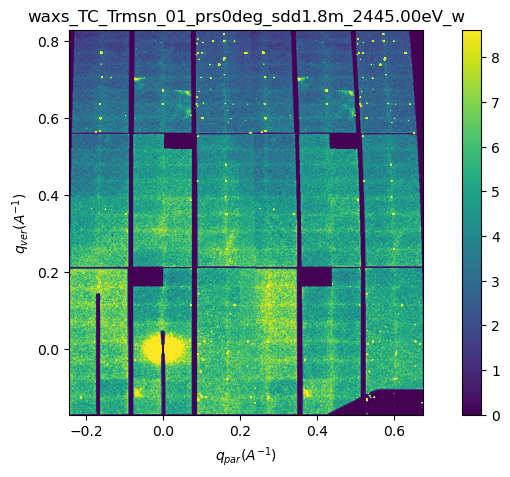

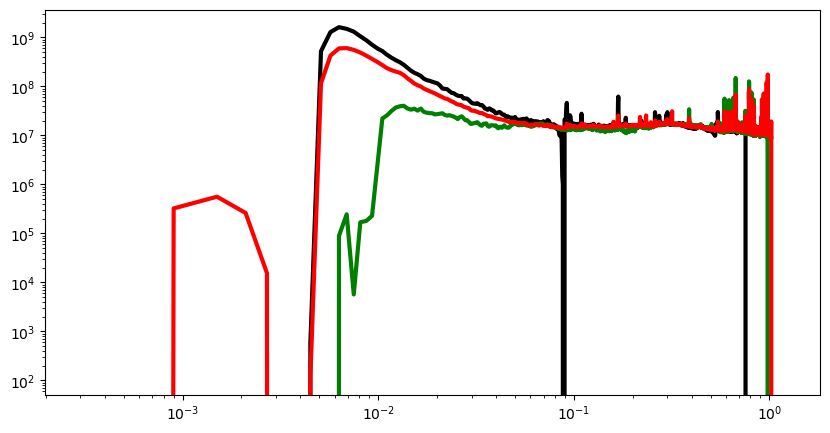

Done


In [71]:
#waxs

for j, dat in enumerate(all_da[-2:-1]):
             
        waxs_angle = [np.deg2rad(-0.06), np.deg2rad(19.7-0.06)]
        
        idx = dat[0].find('eV')
        energy = 0.001*float(dat[0][idx-7:idx])
        print(energy)
        wav = 1E-10 * (12.398/energy)

        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = detector_waxs,
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = 0,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = waxs_angle,
                                             bs_kind = None)
        
        
        SMI_waxs.open_data(path, dat)
#         SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield
        SMI_waxs.masks[1][1254, 47], SMI_waxs.masks[1][1255, 47]=True, True
        SMI_waxs.masks[4][1254, 47], SMI_waxs.masks[4][1255, 47]=True, True

        SMI_waxs.masks[1][979:1050, 0:100], SMI_waxs.masks[4][979:1050, 0:100]=True, True
        SMI_waxs.masks[1][967, 67], SMI_waxs.masks[4][967, 67]=True, True
                
        SMI_waxs.masks[1][490:555, 100:], SMI_waxs.masks[4][490:555, 100:]=True, True
        
        SMI_waxs.masks[1][1231, 174], SMI_waxs.masks[1][1232, 174]=True, True
        SMI_waxs.masks[4][1231, 174], SMI_waxs.masks[4][1232, 174]=True, True
        
        SMI_waxs.masks[1][1414, 179], SMI_waxs.masks[1][1415, 179]=True, True
        SMI_waxs.masks[4][1414, 179], SMI_waxs.masks[4][1415, 179]=True, True
        
        SMI_waxs.masks[1][858, 5], SMI_waxs.masks[1][859, 5]=True, True
        SMI_waxs.masks[4][858, 5], SMI_waxs.masks[4][859, 5]=True, True
            
        SMI_waxs.masks[1][414, 6], SMI_waxs.masks[4][414, 6], =True, True
        SMI_waxs.masks[1][394, 138], SMI_waxs.masks[4][394, 138]=True, True

        SMI_waxs.masks[1][364, 41], SMI_waxs.masks[1][365, 41]=True, True
        SMI_waxs.masks[4][364, 41], SMI_waxs.masks[4][365, 41]=True, True
        
        SMI_waxs.masks[1][364, 96], SMI_waxs.masks[1][365, 96]=True, True
        SMI_waxs.masks[4][364, 96], SMI_waxs.masks[4][365, 96]=True, True
        
        SMI_waxs.masks[1][304, 96], SMI_waxs.masks[1][305, 96], SMI_waxs.masks[1][304, 97], SMI_waxs.masks[1][305, 97]=True, True, True, True
        SMI_waxs.masks[4][304, 96], SMI_waxs.masks[4][305, 96], SMI_waxs.masks[4][304, 97], SMI_waxs.masks[4][305, 97]=True, True, True, True

        
        SMI_waxs.masks[1][181, 97], SMI_waxs.masks[1][182, 97], SMI_waxs.masks[1][181, 98], SMI_waxs.masks[1][182, 98]=True, True, True, True
        SMI_waxs.masks[4][181, 97], SMI_waxs.masks[4][182, 97], SMI_waxs.masks[4][181, 98], SMI_waxs.masks[4][182, 98]=True, True, True, True

#         plt.figure()
#         for i, (img, mask) in enumerate(zip(b, SMI_waxs.masks)):
#             if i%3==0:
#                 SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, :195]+1E-7
#                 SMI_waxs.masks[i][np.where(flatfield[:, :195]<1)] = True
# #                 SMI_waxs.masks[i][np.where(flatfield[:, :195]>50)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

#             if i%3==1:
#                 SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
#                 SMI_waxs.masks[i][np.where(flatfield[:, 211:406]<1)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.flatfield<0.1)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

#             if i%3==2:
#                 SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, -195:]+1E-7
#                 SMI_waxs.masks[i][np.where(flatfield[:, -195:]<1)] = True
# #                 SMI_waxs.masks[i][np.where(flatfield[:, -195:]>50)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

#             plt.subplot(1, len(SMI_waxs.imgs), i+1)
#             plt.imshow(SMI_waxs.imgs[i]*np.logical_not(SMI_waxs.masks[i]), vmin = 0, vmax = 0.1)
#         plt.show()

        SMI_waxs.stitching_data(interp_factor=3, flag_scale=False)

        
        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        
#         SMI_waxs.caking()
#         plt.figure()
#         plt.imshow(SMI_waxs.cake,
#                    extent=[SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1]], 
#                    vmin=0,
#                    vmax=np.percentile(SMI_waxs.cake, 97),
#                    aspect=0.01)    
#         plt.title('waxs_%s'%sam[j])
#         plt.xlabel('$q_{par}(A^{-1})$')
#         plt.ylabel('$q_{ver}(A^{-1})$')
#         plt.colorbar()
#         plt.show()


        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-30, 30], npt = 2000)
        q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-120, -60], npt = 2000)
        q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-180, 180], npt = 2000)
        q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad

#         SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-90, -70], npt=5000)
#         q3, I3 = SMI_waxs.q_rad, SMI_waxs.I_rad



#         SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[70, 90], npt=5000)
#         q4, I4 = SMI_waxs.q_rad, SMI_waxs.I_rad

        plt.figure()
        plt.plot(q0, I0, linewidth = 3, color = 'k')
        plt.plot(q1, I1, linewidth = 3, color = 'g')
        plt.plot(q2, I2, linewidth = 3, color = 'r')
#         plt.plot(q3, I3, linewidth = 3, color = 'b')
#         plt.plot(q4, I4, linewidth = 3, color = 'c')

        plt.yscale('log')
        plt.xscale('log')

        plt.show()

plt.close('all')
print('Done')

2.54


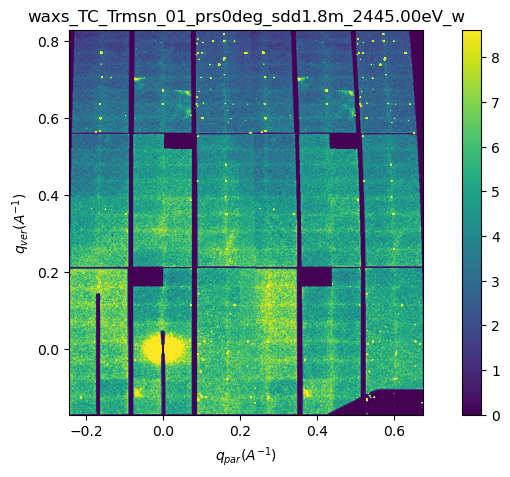

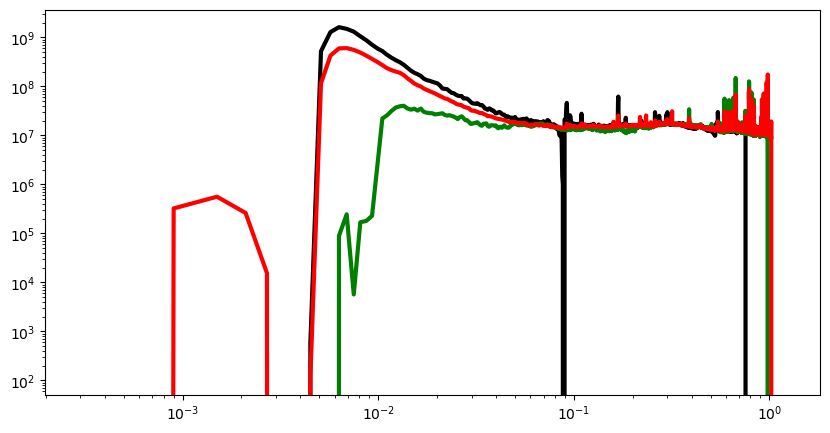

Done


In [38]:
#waxs
flag_save = False
# path = '/nsls2/data/smi/legacy/results/data/%s/%s/900KW/'%(CYCLE, proposal_id)
# ResDir = '/nsls2/data/smi/legacy/results/analysis/%s/%s/reduced_waxs/'%(CYCLE, proposal_id)

for j, dat in enumerate(all_da[-2:-1]):
             
        waxs_angle = [np.deg2rad(-0.06), np.deg2rad(19.7-0.06)]
        
        idx = dat[0].find('eV')
        energy = 0.001*float(dat[0][idx-7:idx])
        print(energy)
        wav = 1E-10 * (12.398/energy)

        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = detector_waxs,
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = 0,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = waxs_angle,
                                             bs_kind = None)
        
        
        SMI_waxs.open_data(path, dat)
#         SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield
        SMI_waxs.masks[1][1254, 47], SMI_waxs.masks[1][1255, 47]=True, True
        SMI_waxs.masks[4][1254, 47], SMI_waxs.masks[4][1255, 47]=True, True

        SMI_waxs.masks[1][979:1050, 0:100], SMI_waxs.masks[4][979:1050, 0:100]=True, True
        SMI_waxs.masks[1][967, 67], SMI_waxs.masks[4][967, 67]=True, True
                
        SMI_waxs.masks[1][490:555, 100:], SMI_waxs.masks[4][490:555, 100:]=True, True
        
        SMI_waxs.masks[1][1231, 174], SMI_waxs.masks[1][1232, 174]=True, True
        SMI_waxs.masks[4][1231, 174], SMI_waxs.masks[4][1232, 174]=True, True
        
        SMI_waxs.masks[1][1414, 179], SMI_waxs.masks[1][1415, 179]=True, True
        SMI_waxs.masks[4][1414, 179], SMI_waxs.masks[4][1415, 179]=True, True
        
        SMI_waxs.masks[1][858, 5], SMI_waxs.masks[1][859, 5]=True, True
        SMI_waxs.masks[4][858, 5], SMI_waxs.masks[4][859, 5]=True, True
            
        SMI_waxs.masks[1][414, 6], SMI_waxs.masks[4][414, 6], =True, True
        SMI_waxs.masks[1][394, 138], SMI_waxs.masks[4][394, 138]=True, True

        SMI_waxs.masks[1][364, 41], SMI_waxs.masks[1][365, 41]=True, True
        SMI_waxs.masks[4][364, 41], SMI_waxs.masks[4][365, 41]=True, True
        
        SMI_waxs.masks[1][364, 96], SMI_waxs.masks[1][365, 96]=True, True
        SMI_waxs.masks[4][364, 96], SMI_waxs.masks[4][365, 96]=True, True
        
        SMI_waxs.masks[1][304, 96], SMI_waxs.masks[1][305, 96], SMI_waxs.masks[1][304, 97], SMI_waxs.masks[1][305, 97]=True, True, True, True
        SMI_waxs.masks[4][304, 96], SMI_waxs.masks[4][305, 96], SMI_waxs.masks[4][304, 97], SMI_waxs.masks[4][305, 97]=True, True, True, True

        
        SMI_waxs.masks[1][181, 97], SMI_waxs.masks[1][182, 97], SMI_waxs.masks[1][181, 98], SMI_waxs.masks[1][182, 98]=True, True, True, True
        SMI_waxs.masks[4][181, 97], SMI_waxs.masks[4][182, 97], SMI_waxs.masks[4][181, 98], SMI_waxs.masks[4][182, 98]=True, True, True, True

#         plt.figure()
#         for i, (img, mask) in enumerate(zip(b, SMI_waxs.masks)):
#             if i%3==0:
#                 SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, :195]+1E-7
#                 SMI_waxs.masks[i][np.where(flatfield[:, :195]<1)] = True
# #                 SMI_waxs.masks[i][np.where(flatfield[:, :195]>50)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

#             if i%3==1:
#                 SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
#                 SMI_waxs.masks[i][np.where(flatfield[:, 211:406]<1)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.flatfield<0.1)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

#             if i%3==2:
#                 SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, -195:]+1E-7
#                 SMI_waxs.masks[i][np.where(flatfield[:, -195:]<1)] = True
# #                 SMI_waxs.masks[i][np.where(flatfield[:, -195:]>50)] = True
# #                 SMI_waxs.masks[i][np.where(SMI_waxs.imgs[i]>1)] = True

#             plt.subplot(1, len(SMI_waxs.imgs), i+1)
#             plt.imshow(SMI_waxs.imgs[i]*np.logical_not(SMI_waxs.masks[i]), vmin = 0, vmax = 0.1)
#         plt.show()

        SMI_waxs.stitching_data(interp_factor=3, flag_scale=False)

        
        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        
#         SMI_waxs.caking()
#         plt.figure()
#         plt.imshow(SMI_waxs.cake,
#                    extent=[SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1]], 
#                    vmin=0,
#                    vmax=np.percentile(SMI_waxs.cake, 97),
#                    aspect=0.01)    
#         plt.title('waxs_%s'%sam[j])
#         plt.xlabel('$q_{par}(A^{-1})$')
#         plt.ylabel('$q_{ver}(A^{-1})$')
#         plt.colorbar()
#         plt.show()


        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-30, 30], npt = 2000)
        q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-120, -60], npt = 2000)
        q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-180, 180], npt = 2000)
        q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad

#         SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-90, -70], npt=5000)
#         q3, I3 = SMI_waxs.q_rad, SMI_waxs.I_rad



#         SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[70, 90], npt=5000)
#         q4, I4 = SMI_waxs.q_rad, SMI_waxs.I_rad

        plt.figure()
        plt.plot(q0, I0, linewidth = 3, color = 'k')
        plt.plot(q1, I1, linewidth = 3, color = 'g')
        plt.plot(q2, I2, linewidth = 3, color = 'r')
#         plt.plot(q3, I3, linewidth = 3, color = 'b')
#         plt.plot(q4, I4, linewidth = 3, color = 'c')

        plt.yscale('log')
        plt.xscale('log')

        plt.show()

plt.close('all')
print('Done')

2.445
['TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa0_bpm5.144_id515719_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2445.00eV_wa20_bpm5.096_id515782_000000_WAXS.tif']


/tmp/ipykernel_118593/3906053897.py:63: RuntimeWarning: invalid value encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, :195]+1E-7
/tmp/ipykernel_118593/3906053897.py:67: RuntimeWarning: divide by zero encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
/tmp/ipykernel_118593/3906053897.py:67: RuntimeWarning: invalid value encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
/tmp/ipykernel_118593/3906053897.py:71: RuntimeWarning: invalid value encountered in divide
  SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, -195:]+1E-7


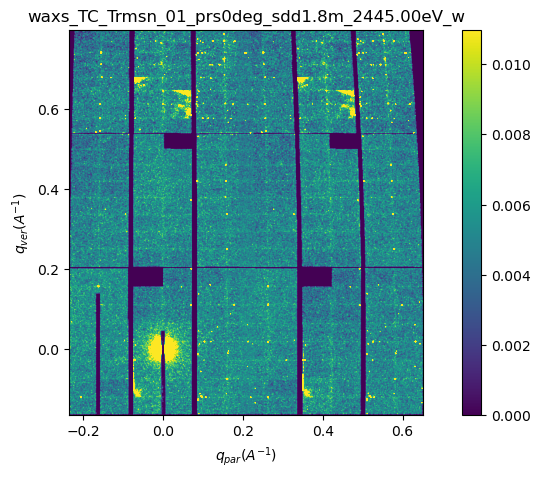

2.45
['TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa0_bpm5.170_id515720_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2450.00eV_wa20_bpm5.128_id515783_000000_WAXS.tif']


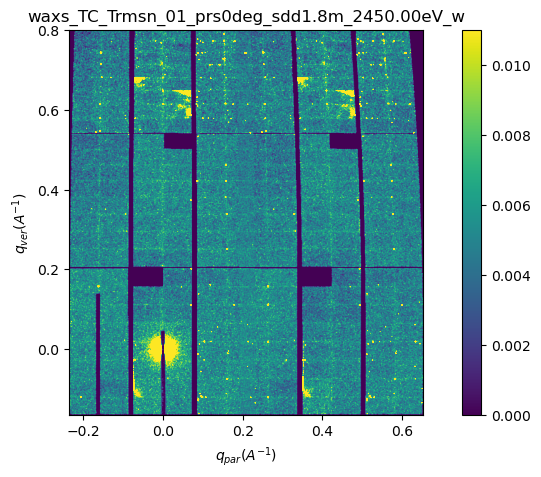

2.455
['TC_Trmsn_01_prs0deg_sdd1.8m_2455.00eV_wa0_bpm5.220_id515721_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2455.00eV_wa20_bpm5.164_id515784_000000_WAXS.tif']


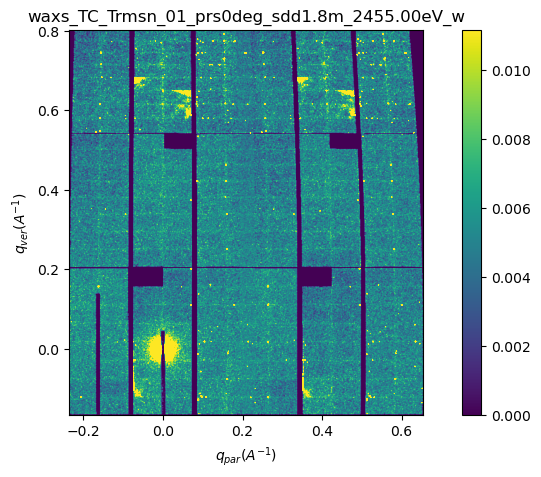

2.46
['TC_Trmsn_01_prs0deg_sdd1.8m_2460.00eV_wa0_bpm5.271_id515722_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2460.00eV_wa20_bpm5.223_id515785_000000_WAXS.tif']


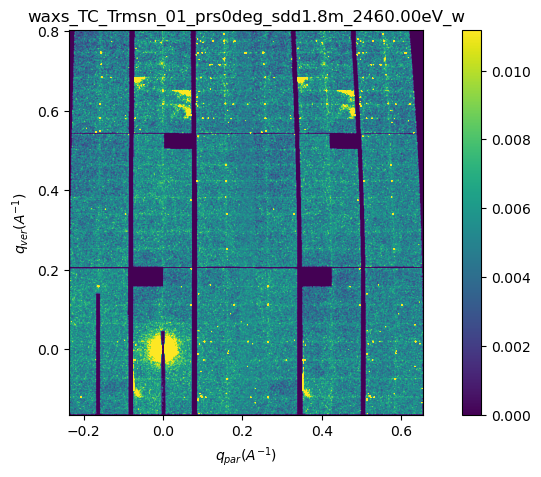

2.465
['TC_Trmsn_01_prs0deg_sdd1.8m_2465.00eV_wa0_bpm5.306_id515723_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2465.00eV_wa20_bpm5.263_id515786_000000_WAXS.tif']


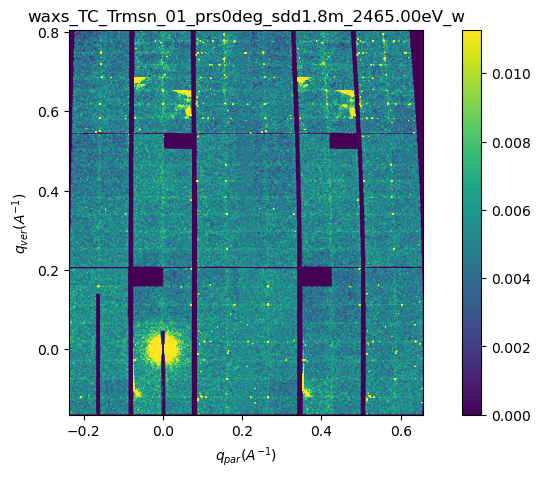

2.47
['TC_Trmsn_01_prs0deg_sdd1.8m_2470.00eV_wa0_bpm5.343_id515724_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2470.00eV_wa20_bpm5.288_id515787_000000_WAXS.tif']


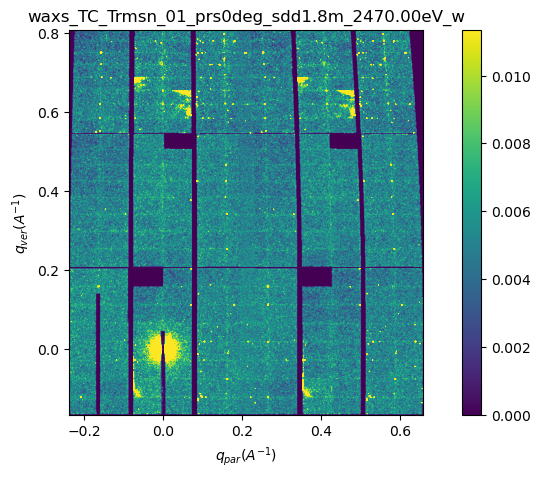

2.47025
['TC_Trmsn_01_prs0deg_sdd1.8m_2470.25eV_wa0_bpm5.333_id515725_000000_WAXS.tif', 'TC_Trmsn_01_prs0deg_sdd1.8m_2470.25eV_wa20_bpm5.281_id515788_000000_WAXS.tif']


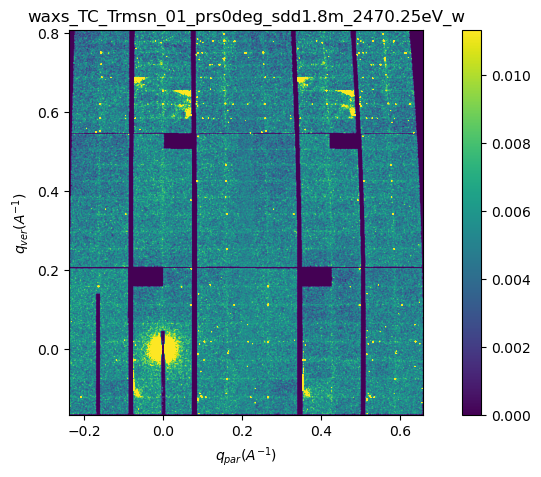

KeyboardInterrupt: 

In [37]:

#waxs
flag_save = False

for j, dat in enumerate(all_da):
    if len(dat)==2:# and 'q_map_waxs_%s.txt'%(sam[j]) not in os.listdir(ResDir):
              
        waxs_angle = [np.deg2rad(-0.06), np.deg2rad(19.7-0.06)]
        
        idx = dat[0].find('eV')
        energy = 0.001*float(dat[0][idx-7:idx])
        print(energy)
        wav = 1E-10 * (12.398/energy)

        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = detector_waxs,
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = 0,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = waxs_angle,
                                             bs_kind = None)
        
        print(dat)
        SMI_waxs.open_data(path, dat)
        
        SMI_waxs.masks[1][1254, 47], SMI_waxs.masks[1][1255, 47]=True, True
        SMI_waxs.masks[4][1254, 47], SMI_waxs.masks[4][1255, 47]=True, True

        SMI_waxs.masks[1][979:1050, 0:100], SMI_waxs.masks[4][979:1050, 0:100]=True, True
        SMI_waxs.masks[1][967, 67], SMI_waxs.masks[4][967, 67]=True, True
                
        SMI_waxs.masks[1][490:555, 100:], SMI_waxs.masks[4][490:555, 100:]=True, True
        
        SMI_waxs.masks[1][1231, 174], SMI_waxs.masks[1][1232, 174]=True, True
        SMI_waxs.masks[4][1231, 174], SMI_waxs.masks[4][1232, 174]=True, True
        
        SMI_waxs.masks[1][1414, 179], SMI_waxs.masks[1][1415, 179]=True, True
        SMI_waxs.masks[4][1414, 179], SMI_waxs.masks[4][1415, 179]=True, True
        
        SMI_waxs.masks[1][858, 5], SMI_waxs.masks[1][859, 5]=True, True
        SMI_waxs.masks[4][858, 5], SMI_waxs.masks[4][859, 5]=True, True
            
        SMI_waxs.masks[1][414, 6], SMI_waxs.masks[4][414, 6], =True, True
        SMI_waxs.masks[1][394, 138], SMI_waxs.masks[4][394, 138]=True, True

        SMI_waxs.masks[1][364, 41], SMI_waxs.masks[1][365, 41]=True, True
        SMI_waxs.masks[4][364, 41], SMI_waxs.masks[4][365, 41]=True, True
        
        SMI_waxs.masks[1][364, 96], SMI_waxs.masks[1][365, 96]=True, True
        SMI_waxs.masks[4][364, 96], SMI_waxs.masks[4][365, 96]=True, True
        
        SMI_waxs.masks[1][304, 96], SMI_waxs.masks[1][305, 96], SMI_waxs.masks[1][304, 97], SMI_waxs.masks[1][305, 97]=True, True, True, True
        SMI_waxs.masks[4][304, 96], SMI_waxs.masks[4][305, 96], SMI_waxs.masks[4][304, 97], SMI_waxs.masks[4][305, 97]=True, True, True, True

        
        SMI_waxs.masks[1][181, 97], SMI_waxs.masks[1][182, 97], SMI_waxs.masks[1][181, 98], SMI_waxs.masks[1][182, 98]=True, True, True, True
        SMI_waxs.masks[4][181, 97], SMI_waxs.masks[4][182, 97], SMI_waxs.masks[4][181, 98], SMI_waxs.masks[4][182, 98]=True, True, True, True

        for i, (img, mask) in enumerate(zip(SMI_waxs.imgs, SMI_waxs.masks)):
            if i%3==0:
                SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, :195]+1E-7
                SMI_waxs.masks[i][np.where(flatfield[:, :195]<1)] = True

            if i%3==1:
                SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, 211:406]+1E-7
                SMI_waxs.masks[i][np.where(flatfield[:, 211:406]<1)] = True

            if i%3==2:
                SMI_waxs.imgs[i] = SMI_waxs.imgs[i]/flatfield[:, -195:]+1E-7
                SMI_waxs.masks[i][np.where(flatfield[:, -195:]<1)] = True
        
        
        SMI_waxs.stitching_data(interp_factor=3, flag_scale=False)

        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title('waxs_%s'%(sam[j]))
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

#         SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-30, 30], npt = 2000)
#         q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

#         SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-120, -60], npt = 2000)
#         q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 1.2], azimuth_range=[-180, 180], npt = 2000)
        q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad

        
        if flag_save:
            #Save the plot as a png
            plt.savefig(os.path.join(ResDir, 'q_map_waxs_%s.png'%(sam[j])))
            plt.close() 

#             np.savetxt(os.path.join(ResDir, 'Radint_hor_waxs_%s.txt'%(sam[j])), np.vstack((q0, I0)).T)
#             np.savetxt(os.path.join(ResDir, 'Radint_ver_waxs_%s.txt'%(sam[j])), np.vstack((q1, I1)).T)
            np.savetxt(os.path.join(ResDir, 'Radint_tot_waxs_%s.txt'%(sam[j])), np.vstack((q2, I2)).T)

print('Done')

In [ ]:
dat